# Product Matching -- EDA - BT Grocery Dataset - One Example


### Key goals:
 - Explore the STSB datasets
   ref: https://huggingface.co/datasets/sentence-transformers/stsb
#### Dataset Card for STSB

The Semantic Textual Similarity Benchmark (Cer et al., 2017) is a collection of sentence pairs drawn from news headlines, video and image captions, and natural language inference data. Each pair is human-annotated with a similarity score from 1 to 5. However, for this variant, the similarity scores are normalized to between 0 and 1.

Dataset Details
Columns: "sentence1", "sentence2", "score"
Column types: str, str, float

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_parquet('../../datasets/real_data/grocery/matches_training.parquet')
df.head(3)

,base_title,base_size,base_brand,base_description,base_source_store,base_category,base_sku,comp_title,comp_size,comp_brand,...,string_sim_score,labels,current_model_score,new_model_score,desc_key,score,dup_key,base_uuid,comp_uuid,row_num
0,"Healthy Choice Power Bowls, Chicken & Quinoa 1...",nan,Healthy Choice,"Chicken, quinoa, and vegetables.",llmsynthetic_llmsynthetic,Food,a1d3406e59,"Weight Watchers Smart Ones, Chicken & Quinoa 1...",12 oz.,Weight Watchers,...,0.6046511627906976,0.0,0.7183989882469177,0.0,"healthy choice power bowls, chicken & quinoa 1...",nan,nan,nan,nan,nan
1,Minute Maid Limeade,nan,Minute Maid,"Homemade taste, no artificial flavors",llmsynthetic_llmsynthetic,Produce,1193b16878,"Sunkist Limes, 10 lb bag",nan,Sunkist,...,0.4,0.0,0.6332633793354034,0.0,"minute maid limeade, 1 gallonsunkist limes, 10...",nan,nan,nan,nan,nan
2,Cheesecake Squares-16 pieces,nan,Entenmann's,"Delicious cheesecake squares, individually wra...",llmsynthetic_llmsynthetic,Bakery,b279467c42,Cheesecake Ice Cream-1.5 qt.,nan,Edy's,...,0.5490196078431373,0.0,0.762024313211441,0.0,cheesecake squares-16 piecescheesecake ice cre...,nan,nan,nan,nan,nan


In [49]:
df = pd.read_csv('../../datasets/stsb/stsb_train',)
catalog_a, catalog_b, score = list(df['']), list(df['comp_description']), list(df['string_sim_score'])

number_of_rows = 10
catalog_a = catalog_a[:number_of_rows]
catalog_b = catalog_b[:number_of_rows]
ref_score = score[:number_of_rows]

KeyError: 'base_description'

In [36]:
df_small = df.sample(n=1000)

In [37]:
# df_small

In [38]:
df_small.to_parquet('../../../PM-Model-Training-project/datasets/matches_training_smallsize1000.parquet')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278495 entries, 0 to 278494
Data columns (total 58 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   base_title               278495 non-null  object
 1   base_size                278495 non-null  object
 2   base_brand               278495 non-null  object
 3   base_description         278495 non-null  object
 4   base_source_store        278495 non-null  object
 5   base_category            278495 non-null  object
 6   base_sku                 278495 non-null  object
 7   comp_title               278495 non-null  object
 8   comp_size                278495 non-null  object
 9   comp_brand               278495 non-null  object
 10  comp_description         278495 non-null  object
 11  comp_source_store        278495 non-null  object
 12  comp_sku                 278495 non-null  object
 13  base_uom                 198495 non-null  object
 14  base_upc            

<Axes: ylabel='base_category'>

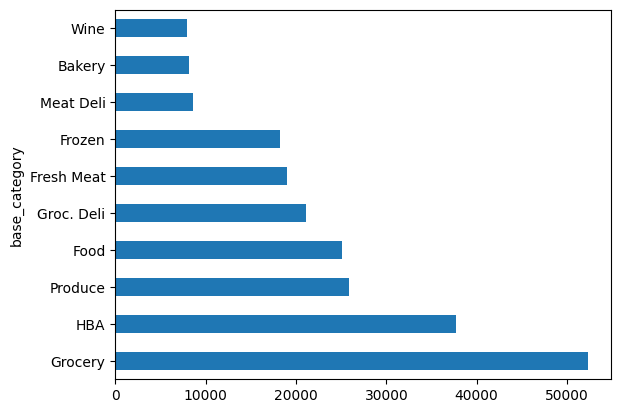

In [42]:
df['base_category'].value_counts()[:10].plot(kind='barh')

In [43]:
df['base_description'] = df['base_description'].str.split(',')
df['word_count'] = df['base_description'].apply(len)


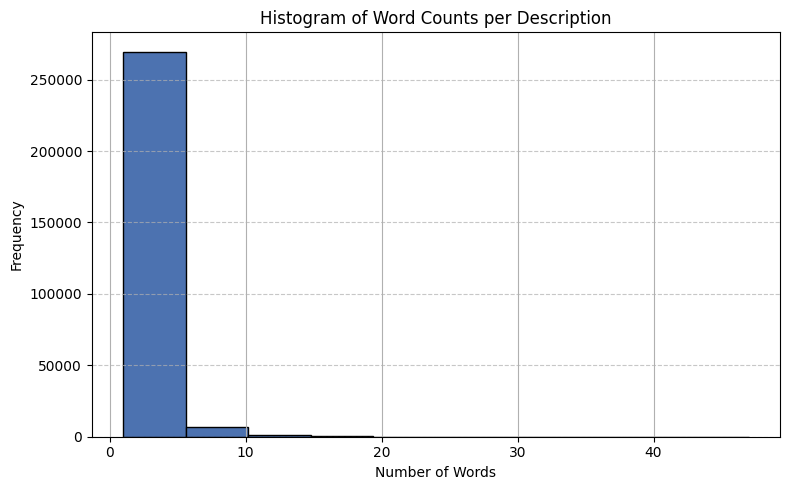

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df['word_count'].hist(bins=10, edgecolor='black', color='#4C72B0')
plt.title('Histogram of Word Counts per Description')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
# plt.xticks(range(1, df['word_count'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Axes: ylabel='Frequency'>

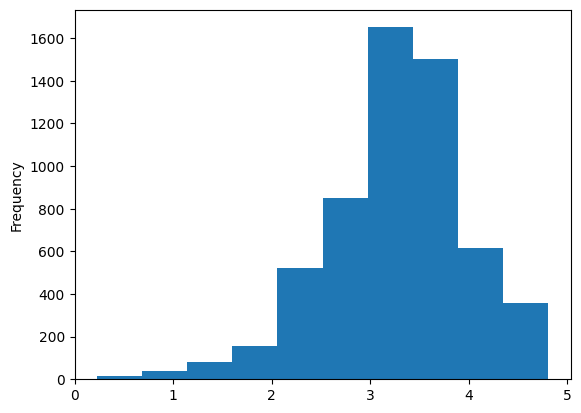

In [24]:
df['st_score'] = df['st_score'].astype('float')
df['st_score'].plot(kind='hist')

In [10]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# sns.histplot(df['st_score'], bins=19, kde=True, stat='percent',
#              color='skyblue', edgecolor='black', cumulative=True)

# plt.title('Distribution of Scores', fontsize=16)
# plt.xlabel('Score', fontsize=14)
# plt.ylabel('Frequency', fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()


In [27]:
df[df['st_score']<.4].head(10)

,base_title,base_size,base_brand,base_description,base_source_store,base_category,base_sku,comp_title,comp_size,comp_brand,...,comp_alt_uom,base_price,comp_dimensions,comp_upc,base_img,answer,comp_sku_uuid,base_sku_uuid,key,st_score
4662,Stater Bros. Fresh Cut Mixed Melon Spears With...,16.0,STATER BROS.,nan,staterbros_staterbros,Cut Produce,31884658,Tresemme Cruelty-free Pro Infusion Fluid Curls...,16.5,UNILEVER,...,nan,nan,nan,022400011509,https://i.mctimg.com/file/dcdaaa80fb6469edbcb0...,not_a_match,86675605<>target<>target,31884658<>staterbros<>staterbros,31884658<>staterbros<>staterbros<$>86675605<>t...,0.384704
4840,Bakery Cinnamon Rolls With Cream Cheese 8ct 8 ...,8.0,STATER BROS.,nan,staterbros_staterbros,Bakery,90908788,Boars Head London Broil Pinwheel Gng - Each (5...,1.0,ALBERTSONS,...,Each,nan,nan,0021046300000,https://i.mctimg.com/file/e401fe45fc018aa81d10...,not_a_match,970029737<>albertsons<>albertsons,90908788<>staterbros<>staterbros,90908788<>staterbros<>staterbros<$>970029737<>...,0.225756


In [29]:
df[df['st_score']>4.5].head(3)

,base_title,base_size,base_brand,base_description,base_source_store,base_category,base_sku,comp_title,comp_size,comp_brand,...,comp_alt_uom,base_price,comp_dimensions,comp_upc,base_img,answer,comp_sku_uuid,base_sku_uuid,key,st_score
23,"St Pierre, Burger Buns, Brioche 4 count",7.0,ST PIERRE,Deliciously soft with a beautiful buttery tast...,staterbros_staterbros,Bakery,13596416,St Pierre® Brioche Hamburger Buns,7.0,ST PIERRE,...,nan,0.0,4.0 [in_i] x 13.05 [in_i],0081166902024,https://i.mctimg.com/cdn-cgi/image/fit=pad/htt...,exact_match,upc_0081166902024<>clicklist<>ralphs,13596416<>staterbros<>staterbros,13596416<>staterbros<>staterbros<$>upc_0081166...,4.697481
60,"The Cheesecake Factory, Wheat Sandwich Loaf, B...",17.7,CHEESECAKE FACTORY,Our Famous Brown Bread. No artificial preserva...,staterbros_staterbros,Bakery,13596455,The Cheesecake Factory Brown Bread Wheat Sandw...,17.7,nan,...,nan,nan,nan,0003967737710,https://i.mctimg.com/cdn-cgi/image/fit=pad/htt...,exact_match,0003967737710<>clicklist<>food4less,13596455<>staterbros<>staterbros,13596455<>staterbros<>staterbros<$>00039677377...,4.776339
62,"La Brea Bakery, Loaf, Whole Grain 18 oz",18.0,LA BREA BAKERY,Whole grain loaf. Whole Grain: 9 g or more per...,staterbros_staterbros,Bakery,13596592,La Brea Bakery Whole Grain Loaf,18.0,La Brea Bakery,...,nan,0.0,3.36 [in_i] x 5.4 [in_i],0078142100418,https://i.mctimg.com/cdn-cgi/image/fit=pad/htt...,exact_match,upc_0078142100418<>clicklist<>ralphs,13596592<>staterbros<>staterbros,13596592<>staterbros<>staterbros<$>upc_0078142...,4.734795
